# Pulsars

In [19]:
import pandas as pd
import os
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import urllib
import math
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.decomposition import PCA

tf.enable_eager_execution()

In [20]:
data = pd.read_csv('data/pulsar_stars/pulsar_stars.csv')

In [21]:
columns = data.columns
IP1, IP2, IP3, IP4 = columns[0], columns[1], columns[2], columns[3]
DM1, DM2, DM3, DM4 = columns[4], columns[5], columns[6], columns[7]

data = data.rename(columns={ 
    columns[0]: 'IP1', columns[1]: 'IP2', columns[2]: 'IP3', columns[3]: 'IP4',
    columns[4]: 'DM1', columns[5]: 'DM2', columns[6]: 'DM3', columns[7]: 'DM4',
    columns[8]: 'target'
})

In [22]:
nonPulsars = data.groupby('target').get_group(0).drop(columns='target')
pulsars = data.groupby('target').get_group(1).drop(columns='target')

In [23]:
nonPulsars.head(10)

,IP1,IP2,IP3,IP4,DM1,DM2,DM3,DM4
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306
5,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004
6,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567
7,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457
8,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506
9,107.257812,39.496488,0.465882,1.162877,4.079431,24.980418,7.397080,57.784738


In [6]:
pulsars.head(10)

,IP1,IP2,IP3,IP4,DM1,DM2,DM3,DM4
19,99.367188,41.572202,1.547197,4.154106,27.555184,61.719016,2.208808,3.662680
42,120.554688,45.549905,0.282924,0.419909,1.358696,13.079034,13.312141,212.597029
61,27.765625,28.666042,5.770087,37.419009,73.112876,62.070220,1.268206,1.082920
92,23.625000,29.948654,5.688038,35.987172,146.568562,82.394624,-0.274902,-1.121848
93,94.585938,35.779823,1.187309,3.687469,6.071070,29.760400,5.318767,28.698048
100,123.468750,45.475085,0.345781,0.647415,32.919732,65.094197,1.605538,0.871364
110,35.156250,30.237714,4.203475,24.486691,34.101171,62.577395,1.890020,2.572133
132,18.117188,29.297670,6.446706,44.601588,50.107860,66.321825,1.456423,1.335182
145,44.867188,45.693334,2.888739,8.810673,176.119565,59.737720,-1.785377,2.940913
146,26.921875,34.511006,4.709838,24.247400,183.622910,79.932815,-1.326647,0.346712


In [7]:
combinations = list(itertools.combinations(['IP1','IP2','IP3','IP4','DM1','DM2','DM3','DM4'], 2))

In [9]:
def plotCombination(combination):
    data.plot.scatter(x=combination[0],
                      y=combination[1],
                       c = 'target',
                       colormap='viridis', 
                       alpha = 0.05
                     )
    
    ax=plt.gca()
    im=ax.images
    cb=ax.collections[-1].colorbar
    cb.remove()
    plt.axis('off')
    plt.savefig('pulsars/' + combination[0] + '_' + combination[1] + '.png')
    plt.close('all')

for combination in combinations:
    plotCombination(combination)

In [ ]:
def showImages(list_of_files):
    number_of_files = len(list_of_files)
    columns = 5
    rows = math.ceil(number_of_files / columns) 
    fig, axs = plt.subplots(rows, columns, figsize=(18,18))
    for i in range(columns * rows):
        x = math.floor(i / columns)
        y = i % columns
        ax = axs[x, y]
        if i < number_of_files:
            image = plt.imread(list_of_files[i])
            ax.imshow(image, interpolation='bilinear', aspect='auto')
            ax.text(0.5, -0.1, list_of_files[i]
                    .replace('pulsars/','')
                    .replace('_',' - ')
                    .replace('.png','')
                    , size=12, ha="center", transform=axs[x, y].transAxes)
        ax.spines['bottom'].set_color('0.5')
        ax.spines['top'].set_color('0.5')
        ax.spines['right'].set_color('0.5')
        ax.spines['left'].set_color('0.5')
        ax.xaxis.set_ticks_position('none') 
        ax.yaxis.set_ticks_position('none') 
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        plt.subplots_adjust(wspace=0, hspace=0.15)
    
showImages(list(map(lambda name: 'pulsars/' + name, os.listdir("pulsars"))))

In [10]:
target = data.pop('target')

In [11]:
dataset = tf.data.Dataset.from_tensor_slices((data.values, target.values))

In [12]:
for feat, targ in dataset.take(10):
  print('Features: {}, Target: {}'.format(feat, targ))

Instructions for updating:
Colocations handled automatically by placer.
Features: [140.5625      55.68378214  -0.23457141  -0.6996484    3.19983278
  19.11042633   7.97553179  74.24222492], Target: 0
Features: [102.5078125   58.88243001   0.46531815  -0.51508791   1.67725752
  14.86014572  10.57648674 127.3935796 ], Target: 0
Features: [103.015625    39.34164944   0.32332837   1.05116443   3.12123746
  21.74466875   7.73582202  63.17190911], Target: 0
Features: [ 1.36750000e+02  5.71784487e+01 -6.84146380e-02 -6.36238369e-01
  3.64297659e+00  2.09592803e+01  6.89649891e+00  5.35936607e+01], Target: 0
Features: [ 88.7265625   40.67222541   0.60086608   1.12349169   1.17892977
  11.4687196   14.26957284 252.5673058 ], Target: 0
Features: [ 93.5703125   46.69811352   0.53190485   0.41672112   1.63628763
  14.54507425  10.6217484  131.3940043 ], Target: 0
Features: [ 1.19484375e+02  4.87650593e+01  3.14602200e-02 -1.12167573e-01
  9.99163880e-01  9.27961224e+00  1.92062302e+01  4.79756567e

In [13]:
train_dataset = dataset.shuffle(len(data)).batch(1)

In [14]:
data.describe()

,IP1,IP2,IP3,IP4,DM1,DM2,DM3,DM4
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837


In [15]:
print("We have", nonPulsars.size, "non-pulsars and", pulsars.size, "pulsars. Data is imbalanced.")

We have 130072 non-pulsars and 13112 pulsars. Data is imbalanced.


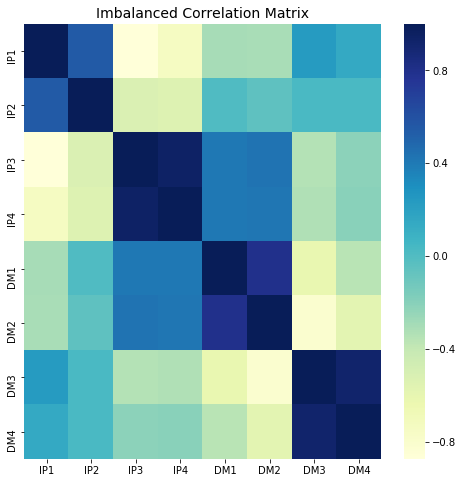

In [16]:
# Sample figsize in inches
fig, ax = plt.subplots(figsize=(8,8))         
# Imbalanced DataFrame Correlation
corr = data.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)
plt.show()

In [18]:
data.target.value_counts().plot(kind='bar', title='Count (target)');

AttributeError: 'DataFrame' object has no attribute 'target'

In [ ]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [ ]:
pca = PCA(n_components=2)
nonPulsarsProjection = pca.fit_transform(nonPulsars)

plot_2d_space(nonPulsarsProjection, 'Imbalanced dataset (2 PCA components)')

In [ ]:
nonPulsarsResampled, pulsarsResampled = SMOTE().fit_resample(nonPulsars, pulsars)